# Exploratory Data Analysis for Machine Learning Project
## By: Denis O'Byrne
## Date: 02/28/2022

### Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review.Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

## Sections required in your report:

## Brief description of the data set and a summary of its attributes

### Initial plan for data exploration

### Actions taken for data cleaning and feature engineering

### Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

### Formulating at least 3 hypothesis about this data

### Conducting a formal significance test for one of the hypotheses and discuss the results 

### Suggestions for next steps in analyzing this data

### A paragraph that summarizes the quality of this data set and a request for additional data if needed

## Introduction
### Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like to develop a strong ML Model to classify if any new borrower is likely to default or not.

## Data Set
### For this assignment I will be analyzing the Loan Default Dataset from Kaggle seen [here](https://www.kaggle.com/yasserh/loan-default-dataset). The data contains 148670 observations with 33 columns of features per observation along with a labled catagorical status (1 = paid, 0 = defaulted). 

### Note that the dataset does not provide descriptions for the variables so the understanding of the variables and factors is not clear.

### For a better understanding of the data set we will begin looking at the data in python and loading in the required libraries to do so


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
data = pd.read_csv("C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/Loan_Default.csv", sep = ",")

In [4]:
data.shape

(148670, 34)

In [5]:
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
data.tail()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0
148669,173559,2019,cf,Female,nopre,type1,p3,l1,nopc,nob/c,...,CIB,830,CIB,45-54,not_inst,72.849462,North,direct,0,44.0


In [7]:
min(data['ID'])

24890

In [8]:
max(data['ID'])

173559

In [9]:
## Examine the columns, look at missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Note that the ID column is not important and should be dropped
### We have a mix of catagorical and continuous features

In [10]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [11]:
data = data.drop(columns = ['ID','year'])

In [12]:
data.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [13]:
data.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


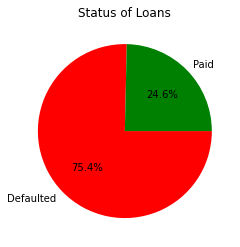

In [14]:
plt.pie(data['Status'].value_counts(), labels=['Defaulted', 'Paid'], counterclock=False, autopct='%1.1f%%', radius=1, startangle=0, colors = ['Red', 'Green'])
plt.title("Status of Loans")
plt.show()

In [15]:
data.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region              

In [16]:
data['loan_limit'].unique()

array(['cf', nan, 'ncf'], dtype=object)

In [17]:
data['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [18]:
data['approv_in_adv'].value_counts()

nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64

In [19]:
data['loan_purpose'].value_counts()

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

In [20]:
36439/148670

0.24509988565278806

In [21]:
data['Neg_ammortization'].value_counts()

not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64

In [22]:
data['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [23]:
data['submission_of_application'].value_counts()

to_inst     95814
not_inst    52656
Name: submission_of_application, dtype: int64

In [24]:
data['term'].value_counts()

360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
280.0         1
322.0         1
165.0         1
Name: term, dtype: int64

In [25]:
fac = []
nums = []
for col in data.columns:
    if data[col].dtype == object:
        fac.append(col)
    else:
        nums.append(col)
print(fac)
print(nums)

['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


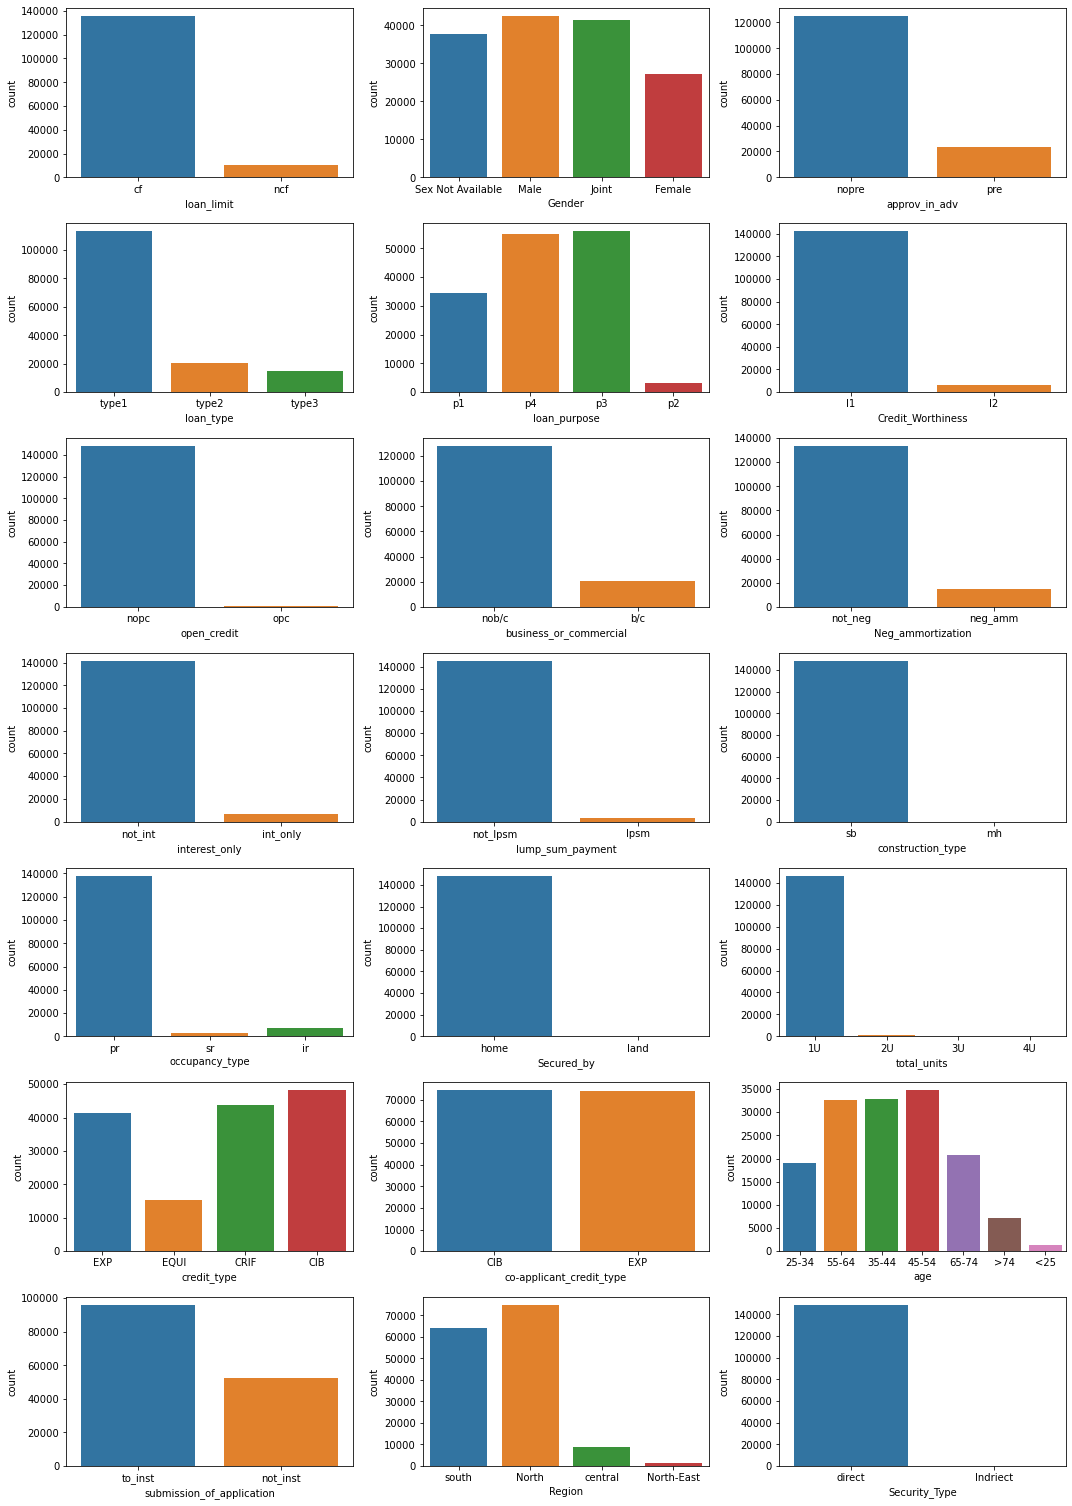

In [26]:
n=3
plt.figure(figsize=[15,3*math.ceil(len(fac)/n)])

for i in range(len(fac)):
    if data[fac[i]].nunique()<=12:
        plt.subplot(math.ceil(len(fac)/n),n,i+1)
        sns.countplot(data[fac[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(data[fac[i]])
plt.tight_layout()
plt.show()

In [27]:
data['open_credit'].value_counts()

nopc    148114
opc        556
Name: open_credit, dtype: int64

In [28]:
556/(148114+556)

0.0037398264612901054

In [29]:
data['construction_type'].value_counts()

sb    148637
mh        33
Name: construction_type, dtype: int64

In [30]:
33/(148637+33)

0.00022196811730678686

In [31]:
data['Secured_by'].value_counts()

home    148637
land        33
Name: Secured_by, dtype: int64

In [32]:
data['Security_Type'].value_counts()

direct      148637
Indriect        33
Name: Security_Type, dtype: int64

In [33]:
data['total_units'].value_counts()

1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64

In [34]:
tmp = data[['Security_Type','Secured_by', 'construction_type']]
tmp[tmp['construction_type'].isin(['mh'])]

,Security_Type,Secured_by,construction_type
7973,Indriect,land,mh
32312,Indriect,land,mh
34412,Indriect,land,mh
35368,Indriect,land,mh
36155,Indriect,land,mh
41151,Indriect,land,mh
44592,Indriect,land,mh
46022,Indriect,land,mh
47828,Indriect,land,mh
56153,Indriect,land,mh


In [35]:
data = data.drop(columns = ['Security_Type', 'construction_type'])

In [36]:
data.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'occupancy_type', 'Secured_by',
       'total_units', 'income', 'credit_type', 'Credit_Score',
       'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV',
       'Region', 'Status', 'dtir1'],
      dtype='object')

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


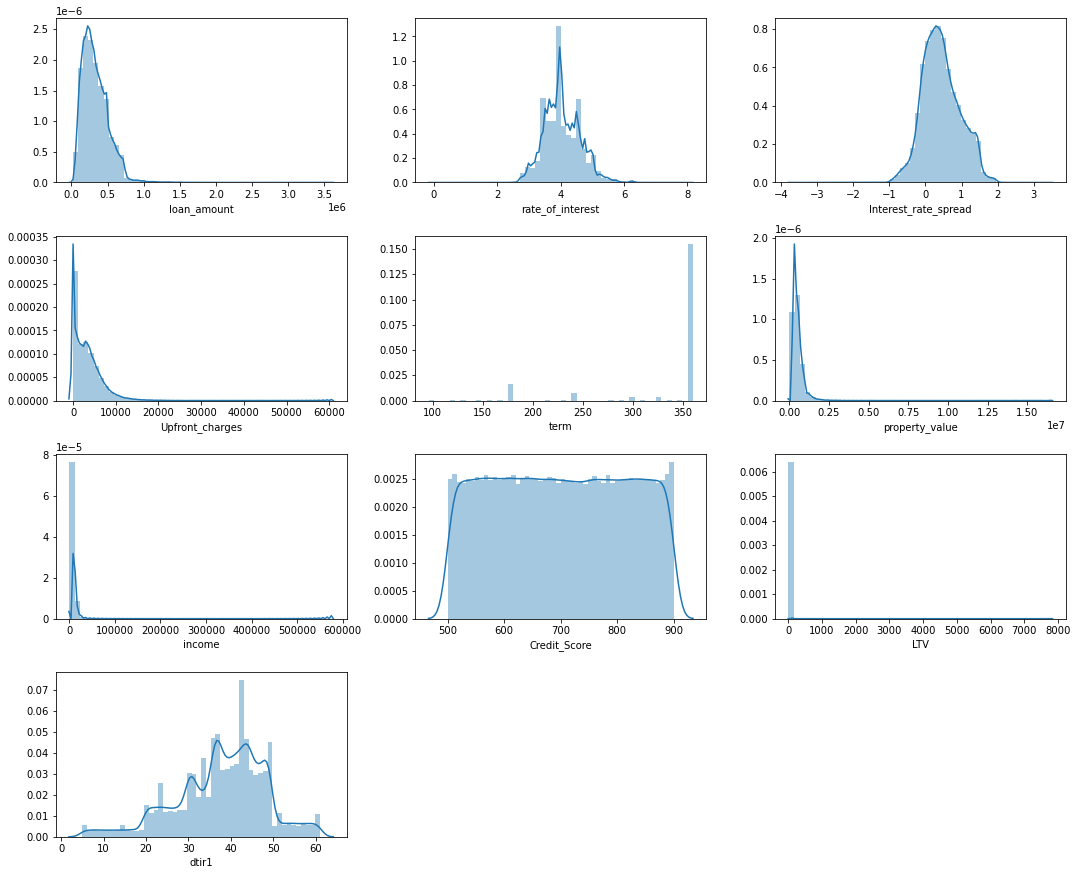

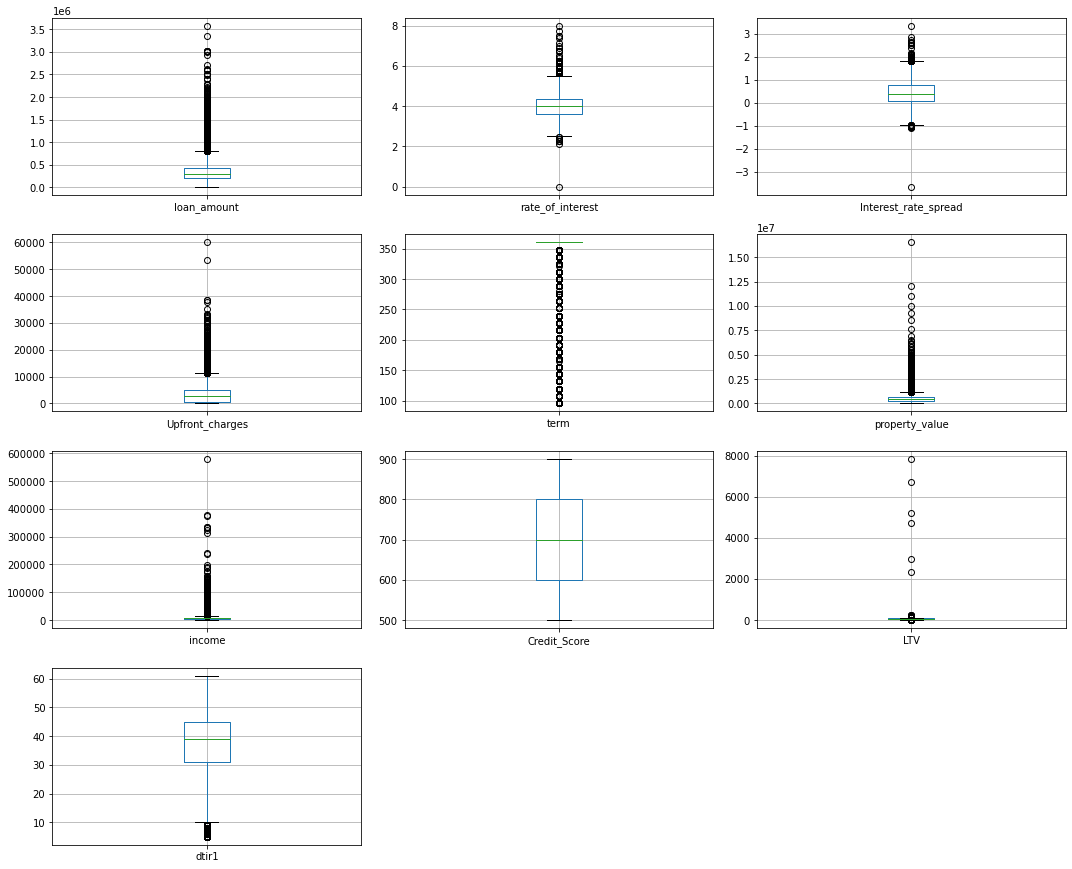

In [37]:
target = 'Status'
labels = ['Defaulter','Not-Defaulter']
features = [i for i in data.columns.values if i not in [target]]

nf = [i for i in features if i not in fac]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(data[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    data.boxplot(nf[c])
plt.tight_layout()
plt.show()


In [38]:
data['LTV'].value_counts()

81.250000    530
91.666667    499
80.038760    380
80.032468    328
94.956140    322
            ... 
30.850168      1
39.777261      1
29.413947      1
19.248008      1
31.263103      1
Name: LTV, Length: 8484, dtype: int64

In [39]:
data.shape

(148670, 30)

# Replacement of outliers and building indicator variables

In [40]:
term_groups = []
for i in range(len(data['term'])):
    if pd.isna(data['term'][i]):
        term_groups.append(data['term'][i])
    elif data['term'][i] <= 90:
        term_groups.append('Q1')
    elif data['term'][i] <= 180:
        term_groups.append('Q2')
    elif data['term'][i] <= 270:
        term_groups.append('Q3')
    elif data['term'][i] <= 359:
        term_groups.append('Q4')
    elif data['term'][i] == 360:
        term_groups.append('Y')
data['term'] = term_groups

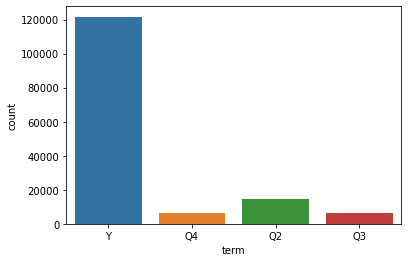

In [41]:
sns.countplot(data['term'])

# Log Transforming Skew Variables

In [42]:
# Create a list of float colums to check for skewing
num_cols = ['loan_amount','rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'property_value', 'income', 'LTV','dtir1', 'Credit_Score']
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[num_cols].skew()

In [43]:
print(skew_vals)

loan_amount               1.666998
rate_of_interest          0.388406
Interest_rate_spread      0.280762
Upfront_charges           1.754076
property_value            4.586276
income                   17.307695
LTV                     120.615337
dtir1                    -0.551465
Credit_Score              0.004767
dtype: float64


In [44]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
LTV,120.615337
income,17.307695
property_value,4.586276
Upfront_charges,1.754076
loan_amount,1.666998


In [45]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    data[col] = data[col].apply(np.log1p)

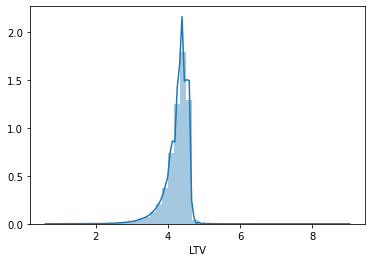

In [46]:
sns.distplot(data['LTV'])

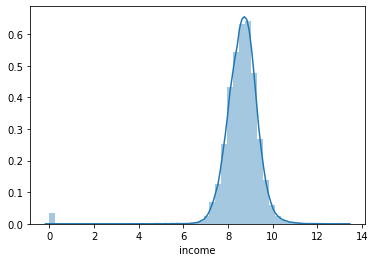

In [47]:
sns.distplot(data['income'])

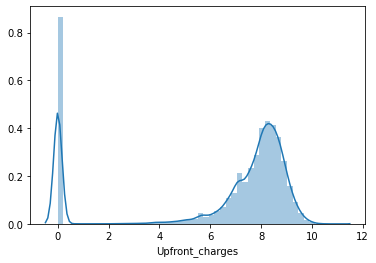

In [48]:
sns.distplot(data['Upfront_charges'])

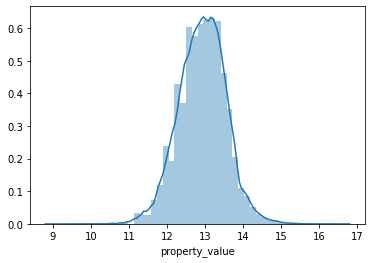

In [49]:
sns.distplot(data['property_value'])

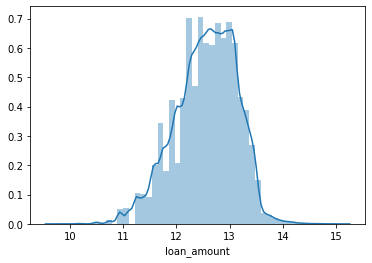

In [50]:
sns.distplot(data['loan_amount'])

feats = ['loan_amount', 'Upfront_charges', 'property_value', 'income', 'LTV']

for z in range(len(feats)):
    big = []
    rep = []
    q3 = data[feats[z]].quantile(0.75)
    q1 = data[feats[z]].quantile(0.25)
    iqr = q3 - q1
    thresh = q3 + 1.5*iqr
    for i in range(len(data[feats[z]])):
        if pd.isna(data[feats[z]][i]):
            rep.append(data[feats[z]][i])
            big.append(0)
        else:
            if data[feats[z]][i] <= thresh:
                rep.append(data[feats[z]][i])
                big.append(0)
            else:
                rep.append(thresh)
                big.append(1)
    str_big = feats[z]+'_big'
    data[feats[z]] = rep
    data[str_big] = big

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(data[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    data.boxplot(nf[c])
plt.tight_layout()
plt.show()

In [51]:
data.isnull().sum()

loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status              

In [52]:
3344/len(data['loan_limit'])

0.022492769220421066

In [53]:
9150/len(data['income'])

0.061545705253245445

In [54]:
39642/len(data['Upfront_charges'])

0.2666442456447165

In [55]:
from sklearn.impute import SimpleImputer

nums = ['rate_of_interest', 'Interest_rate_spread', 'LTV', 'dtir1','property_value']
data['income'] = data['income'].fillna(0)
data['Upfront_charges'] = data['Upfront_charges'].fillna(0)

for col in nums:
    SI = SimpleImputer(strategy='mean')
    data[col] = SI.fit_transform(data[[col]])

mask = data.dtypes == np.object
obj_cols = data.columns[mask]
    
for col in obj_cols:
    SI = SimpleImputer(strategy='most_frequent')
    data[col] = SI.fit_transform(data[[col]])

In [56]:
data.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Status                       0
dtir1                        0
dtype: int64

In [58]:
for i in obj_cols:
    #print(i)
    if data[i].nunique()==2:
        data[i]=pd.get_dummies(data[i], drop_first=True, prefix=str(i))
    if data[i].nunique()>2:
        data = pd.concat([data.drop([i], axis=1), pd.DataFrame(pd.get_dummies(data[i], drop_first=True, prefix=str(i)))],axis=1)

In [59]:
#Feature Scaling (Standardization)
nums = []
for col in data.columns:
    if data[col].nunique()>2:
        nums.append(col)
        
std = StandardScaler()

X_std = std.fit_transform(data[nums])
X_std = pd.DataFrame(X_std, columns=nums)

for col in nums:
    data[col] = X_std[col]

In [60]:
data.describe()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,Neg_ammortization,...,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
count,148670.000000,148670.000000,148670.000000,148670.00000,148670.000000,1.486700e+05,1.486700e+05,1.486700e+05,1.486700e+05,148670.000000,...,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,0.067115,0.155653,0.042551,0.00374,0.860348,2.751564e-16,1.439500e-15,1.272735e-16,7.833887e-16,0.898238,...,0.277924,0.220744,0.234883,0.218834,0.139531,0.008993,0.048261,0.008307,0.058499,0.430591
std,0.250222,0.362528,0.201842,0.06104,0.346626,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.302336,...,0.447977,0.414750,0.423927,0.413457,0.346500,0.094405,0.214318,0.090764,0.234685,0.495161
min,0.000000,0.000000,0.000000,0.00000,0.000000,-4.957628e+00,-8.293946e+00,-9.160401e+00,-1.184335e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,1.000000,-6.426380e-01,-6.057780e-01,-5.841498e-01,-1.184335e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.00000,1.000000,7.392935e-02,1.820924e-15,1.246439e-16,5.901256e-01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.00000,1.000000,7.475723e-01,4.193110e-01,4.004518e-01,8.994243e-01,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,4.411290e+00,8.107479e+00,6.546073e+00,1.589069e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
data.shape

(148670, 49)

In [62]:
data.head()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,Neg_ammortization,...,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
0,0,0,0,0,1,-1.553221,1.820924e-15,1.246439e-16,-1.184335,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,-0.556177,1.820924e-15,1.246439e-16,-1.184335,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0.623545,1.054866e+00,-5.426102e-01,0.426511,0,...,1,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0.825608,4.193110e-01,5.374204e-01,-1.184335,1,...,1,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,1.561501,-9.323350e-02,-3.086410e-01,-1.184335,1,...,0,0,0,0,0,0,0,0,0,0


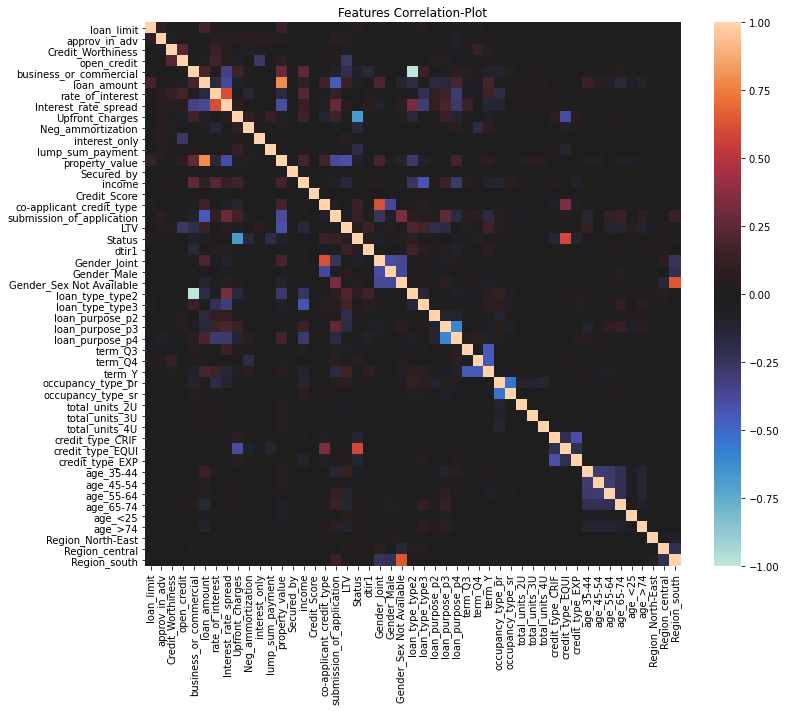

In [63]:
features = data.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(data[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

In [64]:
data = data.drop(columns = ['loan_type_type2'])

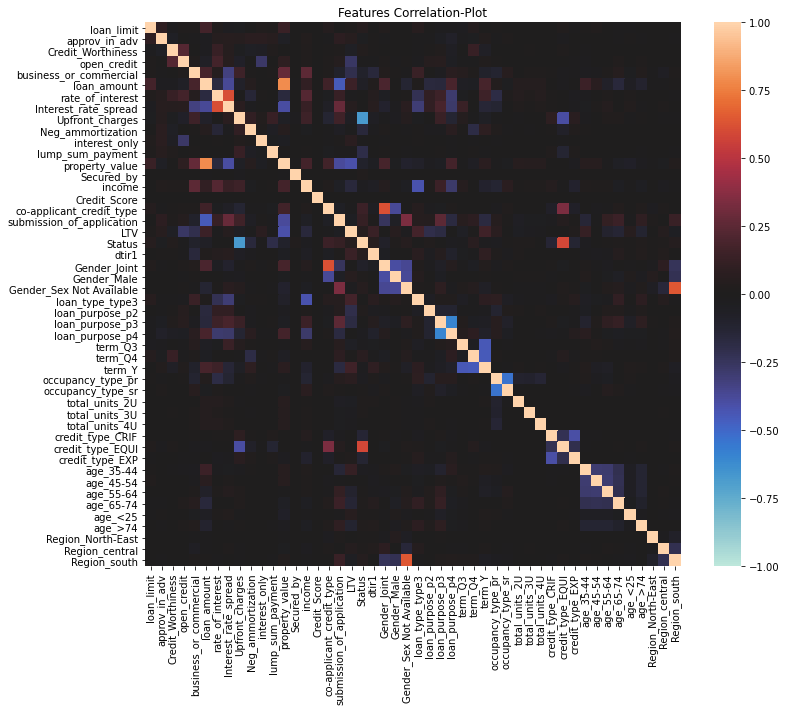

In [65]:
features = data.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(data[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

In [66]:
data['rate_of_interest'].corr(data['Interest_rate_spread'])

0.6143209863866121

In [67]:
data['loan_amount'].corr(data['property_value'])

0.7919049032238942

In [68]:
data = data.drop(columns = ['property_value'])

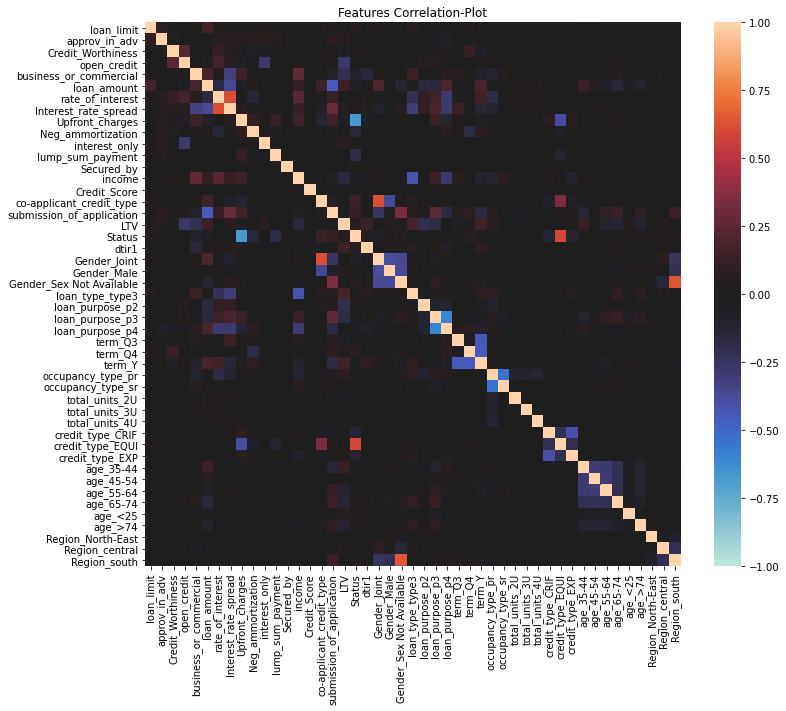

In [69]:
features = data.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(data[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

In [70]:
data[1:5]

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,Neg_ammortization,...,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
1,0,0,0,0,0,-0.556177,1.820924e-15,1.246439e-16,-1.184335,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0.623545,1.054866e+00,-5.426102e-01,0.426511,0,...,1,1,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0.825608,4.193110e-01,5.374204e-01,-1.184335,1,...,1,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,1.561501,-9.323350e-02,-3.086410e-01,-1.184335,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
data.shape

(148670, 47)

In [72]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data['loan_amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\denis\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


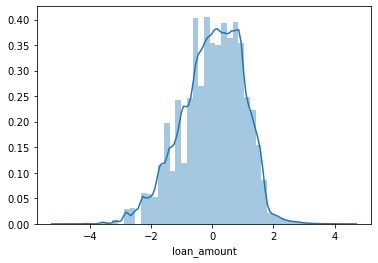

In [73]:
sns.distplot(data['loan_amount'])

In [74]:
from scipy.stats import normaltest
stat, p = normaltest(data['loan_amount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=3629.487, p=0.000
Sample does not look Gaussian (reject H0)


In [75]:
data.columns

Index(['loan_limit', 'approv_in_adv', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'Secured_by', 'income',
       'Credit_Score', 'co-applicant_credit_type', 'submission_of_application',
       'LTV', 'Status', 'dtir1', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'loan_type_type3', 'loan_purpose_p2',
       'loan_purpose_p3', 'loan_purpose_p4', 'term_Q3', 'term_Q4', 'term_Y',
       'occupancy_type_pr', 'occupancy_type_sr', 'total_units_2U',
       'total_units_3U', 'total_units_4U', 'credit_type_CRIF',
       'credit_type_EQUI', 'credit_type_EXP', 'age_35-44', 'age_45-54',
       'age_55-64', 'age_65-74', 'age_<25', 'age_>74', 'Region_North-East',
       'Region_central', 'Region_south'],
      dtype='object')

In [76]:
import scipy.stats as stats

stats.f_oneway(data['rate_of_interest'][data['Gender_Male'] == 1],
               data['rate_of_interest'][data['Gender_Joint'] == 1],
               data['rate_of_interest'][data['Gender_Sex Not Available'] == 1],
              data['rate_of_interest'][(data['Gender_Male'] == 0) & (data['Gender_Joint'] == 0) & (data['Gender_Sex Not Available'] == 0)])

F_onewayResult(statistic=173.5264048391031, pvalue=2.6024115620818563e-112)

In [77]:
stats.f_oneway(data['rate_of_interest'][data['Gender_Male'] == 1],
              data['rate_of_interest'][(data['Gender_Male'] == 0) & (data['Gender_Joint'] == 0) & (data['Gender_Sex Not Available'] == 0)])

F_onewayResult(statistic=224.67150557693387, pvalue=1.039243440002079e-50)

In [78]:
data['rate_of_interest'][data['Gender_Male'] == 1].shape

(42346,)

In [79]:
data['rate_of_interest'][data['Gender_Male'] == 1].mean()

-0.010968703013856218

In [80]:
data['rate_of_interest'][data['Gender_Male'] == 1].std()

0.9917286229656858

In [81]:
data['rate_of_interest'][(data['Gender_Male'] == 0) & (data['Gender_Joint'] == 0) & (data['Gender_Sex Not Available'] == 0)].shape

(27266,)

In [82]:
data['rate_of_interest'][(data['Gender_Male'] == 0) & (data['Gender_Joint'] == 0) & (data['Gender_Sex Not Available'] == 0)].mean()

0.1026491404400715

In [83]:
data['rate_of_interest'][(data['Gender_Male'] == 0) & (data['Gender_Joint'] == 0) & (data['Gender_Sex Not Available'] == 0)].std()

0.9516309894572063

In [84]:
df = pd.read_csv("C:/Users/denis/Desktop/IBM Machine Learning/Final Projects/data/Loan_Default.csv", sep = ",")

In [85]:
df['Gender']

0         Sex Not Available
1                      Male
2                      Male
3                      Male
4                     Joint
                ...        
148665    Sex Not Available
148666                 Male
148667                 Male
148668               Female
148669               Female
Name: Gender, Length: 148670, dtype: object

In [86]:
stats.f_oneway(df['rate_of_interest'][df['Gender'] == "Male"],
              df['rate_of_interest'][df['Gender'] == "Female"])

F_onewayResult(statistic=nan, pvalue=nan)

In [87]:
df['rate_of_interest'][df['Gender'] == "Male"]

1           NaN
2         4.560
3         4.250
10          NaN
15          NaN
          ...  
148631    4.875
148652      NaN
148663      NaN
148666    5.190
148667    3.125
Name: rate_of_interest, Length: 42346, dtype: float64

In [88]:
SI = SimpleImputer(strategy='mean')
df['rate_of_interest'] = SI.fit_transform(df[['rate_of_interest']])

In [89]:
df['rate_of_interest'][df['Gender'] == "Male"]

1         4.045476
2         4.560000
3         4.250000
10        4.045476
15        4.045476
            ...   
148631    4.875000
148652    4.045476
148663    4.045476
148666    5.190000
148667    3.125000
Name: rate_of_interest, Length: 42346, dtype: float64

In [90]:
stats.f_oneway(df['rate_of_interest'][df['Gender'] == "Male"],
              df['rate_of_interest'][df['Gender'] == "Female"])

F_onewayResult(statistic=224.67150557693404, pvalue=1.039243440002079e-50)

In [91]:
df['rate_of_interest'][df['Gender'] == "Male"].mean()

4.040125682383571

In [92]:
df['rate_of_interest'][df['Gender'] == "Male"].std()

0.48372803062761205

In [93]:
df['rate_of_interest'][df['Gender'] == "Female"].mean()

4.095544205542036

In [94]:
df['rate_of_interest'][df['Gender'] == "Female"].std()

0.464169908737542

In [95]:
from scipy import stats
stats.pearsonr(data['Credit_Score'],data['Status'])

(0.004003693595588173, 0.1226544025327888)

In [96]:
SI = SimpleImputer(strategy='mean')
df[['loan_amount','property_value']] = SI.fit_transform(df[['loan_amount','property_value']])

In [97]:
stats.pearsonr(df['loan_amount'],df['property_value'])

(0.6877981104479932, 0.0)

For the Pearson Correlation Test, a low P value indicates a correlation exists, Thus we conclude there is no correlation between Status and Credit Score in our dataset.